In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


In [2]:
df=pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

In [3]:
df.drop(['Present_Price','Car_Name','Year'],axis=1,inplace=True)


In [4]:
df

,Selling_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,3.35,27000,Petrol,Dealer,Manual,0
1,4.75,43000,Diesel,Dealer,Manual,0
2,7.25,6900,Petrol,Dealer,Manual,0
3,2.85,5200,Petrol,Dealer,Manual,0
4,4.60,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...
296,9.50,33988,Diesel,Dealer,Manual,0
297,4.00,60000,Petrol,Dealer,Manual,0
298,3.35,87934,Petrol,Dealer,Manual,0
299,11.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Driven_kms     301 non-null    int64  
 2   Fuel_Type      301 non-null    object 
 3   Selling_type   301 non-null    object 
 4   Transmission   301 non-null    object 
 5   Owner          301 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.2+ KB


In [6]:
df.describe()

,Selling_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000
mean,4.661296,36947.205980,0.043189
std,5.082812,38886.883882,0.247915
min,0.100000,500.000000,0.000000
25%,0.900000,15000.000000,0.000000
50%,3.600000,32000.000000,0.000000
75%,6.000000,48767.000000,0.000000
max,35.000000,500000.000000,3.000000


In [66]:
#EDA 
#univariate analysis
#importing necessary librabries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

/tmp/ipykernel_36/597538511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling_Price', ylabel='Density'>

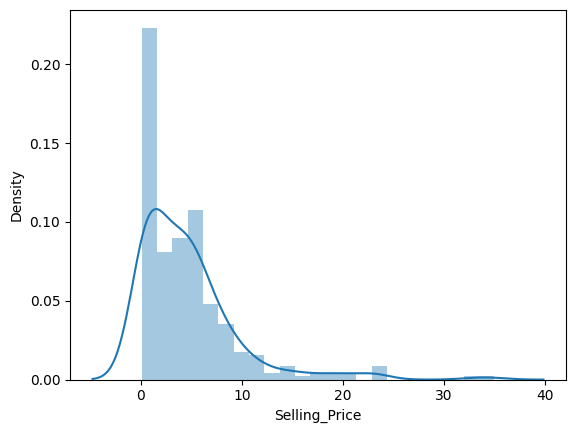

In [9]:
sns.distplot(df['Selling_Price'])
#the data is right skewed

<Axes: >

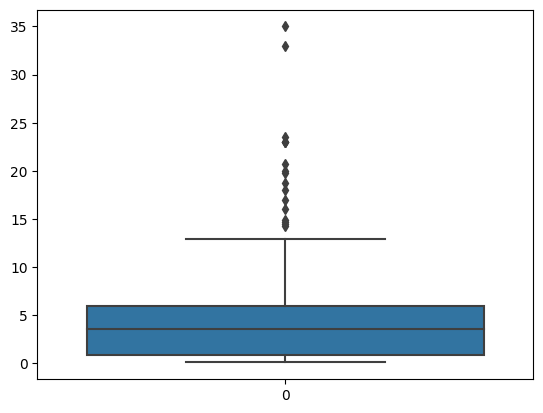

In [10]:
sns.boxplot(df['Selling_Price'])
#outliers are presnt

/tmp/ipykernel_36/2212666052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Driven_kms'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Driven_kms', ylabel='Density'>

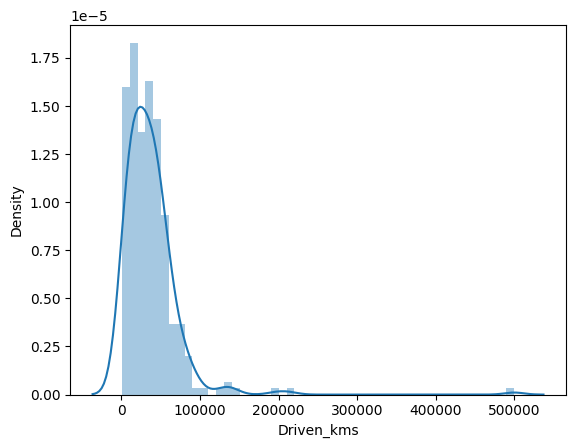

In [11]:
sns.distplot(df['Driven_kms'])
#the data is right skewed

<Axes: >

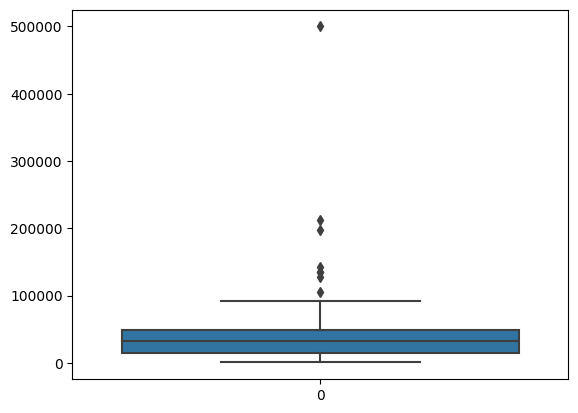

In [12]:
sns.boxplot(df['Driven_kms'])
#data has ouliers

<Axes: xlabel='Fuel_Type'>

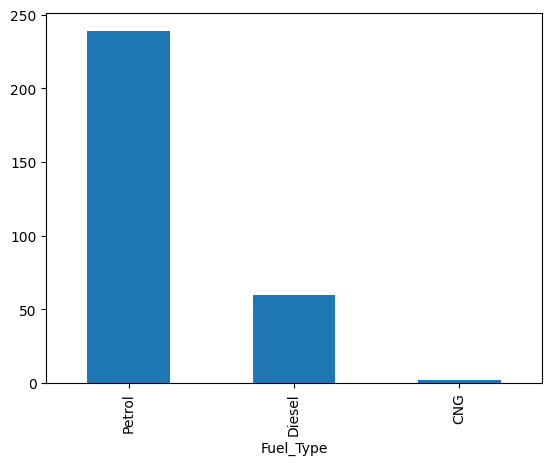

In [13]:
df['Fuel_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Selling_type'>

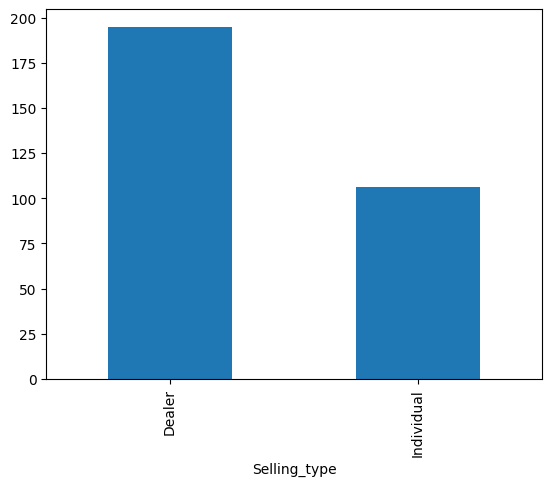

In [14]:
df['Selling_type'].value_counts().plot(kind='bar')

<Axes: xlabel='Transmission'>

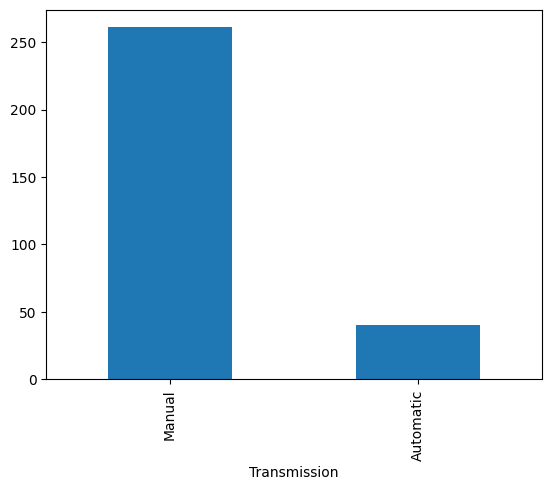

In [15]:
df['Transmission'].value_counts().plot(kind='bar')

<Axes: xlabel='Owner'>

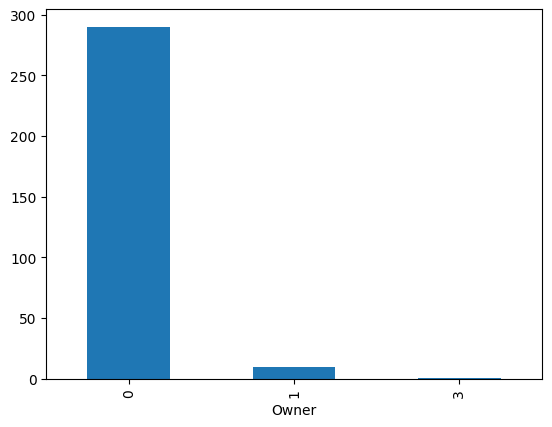

In [16]:
df['Owner'].value_counts().plot(kind='bar')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


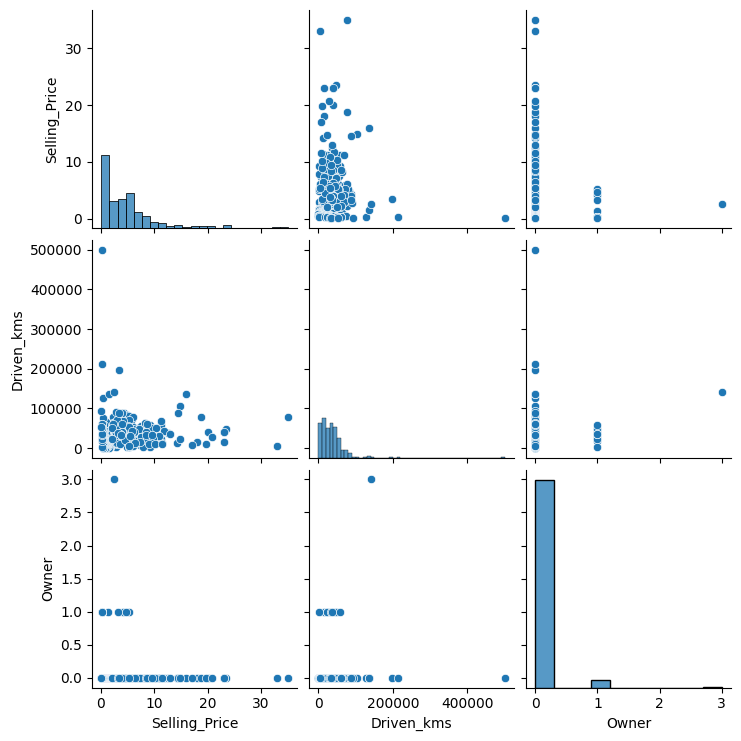

In [17]:
#bivariate analysis
sns.pairplot(df)

In [18]:
#feature engineering
#treating null values
q1=df['Driven_kms'].quantile(0.75)
q2=df['Driven_kms'].quantile(0.25)


q3=df['Selling_Price'].quantile(0.75)
q4=df['Selling_Price'].quantile(0.25)

iqr=q1-q2
Iqr=q3-q4

iqr,Iqr

(33767.0, 5.1)

In [19]:
upper_limit=q1+1.5*iqr
upper_limit1=q3+1.5*Iqr



In [20]:
def imputer(i):
    if i>upper_limit:
        return upper_limit
    else:
        return i
   
    

In [21]:
def icputer(j):
    if j>upper_limit1:
        return upper_limit1
    else:
        return j
    

In [23]:
df['Driven_kms']=df['Driven_kms'].apply(imputer)
df['Selling_Price']=df['Selling_Price'].apply(icputer)

<Axes: >

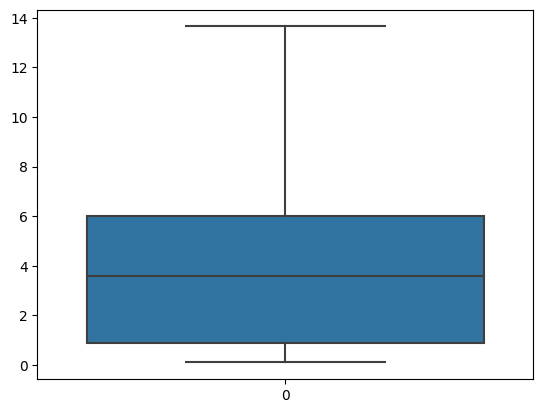

In [26]:
sns.boxplot(df['Selling_Price'])
#outliers have been treated

In [27]:
df.head()

,Selling_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,3.35,27000.0,Petrol,Dealer,Manual,0
1,4.75,43000.0,Diesel,Dealer,Manual,0
2,7.25,6900.0,Petrol,Dealer,Manual,0
3,2.85,5200.0,Petrol,Dealer,Manual,0
4,4.60,42450.0,Diesel,Dealer,Manual,0


In [28]:
X=df.iloc[:,1:6]
y=df.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
X_train

array([[1.5141e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6500e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.1350e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [5.6001e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.3000e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2000e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [60]:
from sklearn.compose import ColumnTransformer

In [74]:
clf=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first',sparse=False),['Fuel_Type','Transmission']),
 ],remainder='passthrough')

In [75]:
clf.fit_transform(X_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [70]:
clf.transform(X_test)

ValueError: X has 5 features, but ColumnTransformer is expecting 9 features as input.

In [64]:
X_train

array([[1.5141e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6500e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.1350e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [5.6001e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.3000e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2000e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])